In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [100]:
citypath = '2020_11_02_01_22_citymap/log.txt'
circlepath = '2020_11_02_01_36_circle/log.txt'

In [101]:
df_circle = pd.read_csv(circlepath,names = ['x','y','z'])
df_city = pd.read_csv(citypath,names = ['x','y','z'])

# Circle

(-70.0, 20.0)

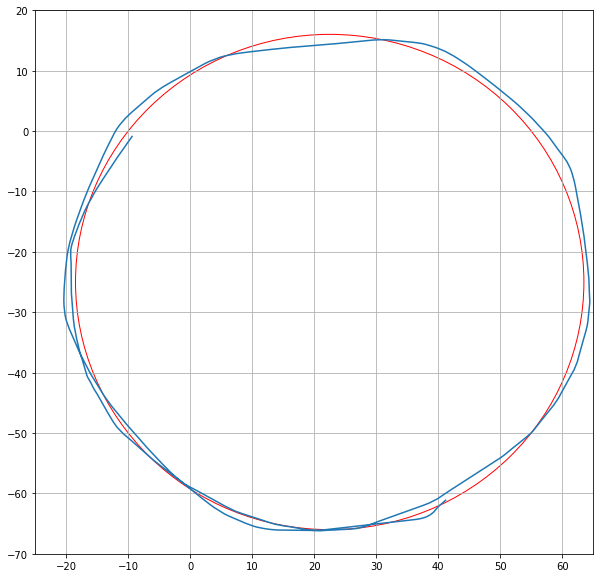

In [64]:
# Circle
fig, ax = plt.subplots(figsize = (10,10))
circle = plt.Circle((22.5, -25), 41, color='red', fill = False)

ax.add_artist(circle)
ax.plot(df.x,df.y)

ax.grid()
plt.xlim(-25,65)
plt.ylim(-70,20)

In [94]:
def dist_from(center, r, point):
    return abs(((((point[0] - center[0])** 2) + ((point[1] - center[1])** 2))**(1/2)) - r)

distance = 41


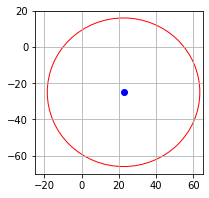

In [95]:
point = central

fig, ax = plt.subplots(figsize = (3,3))
central = (22.5, -25)
radius = 41
circle = plt.Circle(central, radius, color='red', fill = False)
ax.add_artist(circle)
plt.xlim(-25,65)
plt.ylim(-70,20)
ax.grid()

print('distance = %d' % dist_from(central,radius,point))
plt.plot(point[0],point[1], 'bo')

distance = 16


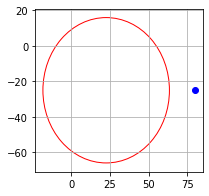

In [92]:
point = [80, central[1]]

fig, ax = plt.subplots(figsize = (3,3))
central = (22.5, -25)
radius = 41
circle = plt.Circle(central, radius, color='red', fill = False)
ax.add_artist(circle)
ax.plot(point[0],point[1], 'bo')

plt.xlim(min(central[0]-radius-5,point[0]-5),max(central[0]+radius+5,point[0]+5))
plt.ylim(min(central[1]-radius-5,point[1]-5),max(central[1]+radius+5,point[1]+5))

ax.grid()

print('distance = %d' % dist(central,radius,point))

plt.show()

## City

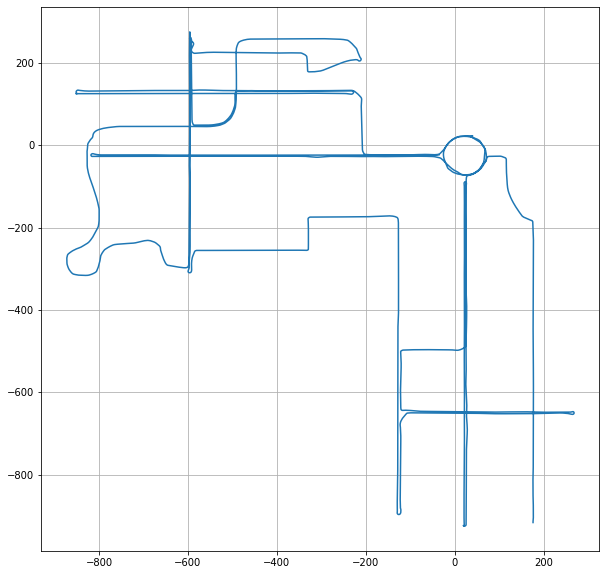

In [102]:
# City mapped out by driving
fig, ax = plt.subplots(figsize = (10,10))
ax.plot(df_city.x,df_city.y)
ax.grid()